In [15]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from yahoofinancials import YahooFinancials
import json
import hvplot.pandas


import numpy as np
import panel as pn
from panel.interact import interact
import plotly.express as px
pn.extension("plotly")

In [16]:
yahoo_financials = YahooFinancials('GC=F')
gold_prices=(yahoo_financials.get_historical_price_data("2020-06-01", "2022-06-01", "weekly"))

In [17]:
json_object= json.dumps(gold_prices['GC=F']['prices'], indent = 4)
with open("sample.json", "w") as outfile:
    outfile.write(json_object)

In [18]:
gold_prices = pd.read_json('sample.json')

In [19]:
gold_prices

,date,high,low,open,close,volume,adjclose,formatted_date
0,2020-06-01 04:00:00,1747.000000,1668.599976,1740.400024,1676.199951,6676,1676.199951,2020-06-01
1,2020-06-08 04:00:00,1744.099976,1675.900024,1679.099976,1729.300049,2660,1729.300049,2020-06-08
2,2020-06-15 04:00:00,1750.699951,1703.300049,1730.000000,1745.900024,1700,1745.900024,2020-06-15
3,2020-06-22 04:00:00,1783.099976,1750.500000,1755.199951,1772.500000,3830,1772.500000,2020-06-22
4,2020-06-29 04:00:00,1798.000000,1765.800049,1779.800049,1784.000000,2116,1784.000000,2020-06-29
...,...,...,...,...,...,...,...,...
100,2022-05-02 04:00:00,1904.300049,1853.000000,1896.699951,1881.199951,1146,1881.199951,2022-05-02
101,2022-05-09 04:00:00,1867.500000,1807.400024,1866.599976,1807.400024,3224,1807.400024,2022-05-09
102,2022-05-16 04:00:00,1841.800049,1787.000000,1790.500000,1841.800049,714,1841.800049,2022-05-16
103,2022-05-23 04:00:00,1867.000000,1840.400024,1846.300049,1851.300049,153695,1851.300049,2022-05-23


In [20]:
gold_prices_df = pd.DataFrame(gold_prices)
gold_prices_df

,date,high,low,open,close,volume,adjclose,formatted_date
0,2020-06-01 04:00:00,1747.000000,1668.599976,1740.400024,1676.199951,6676,1676.199951,2020-06-01
1,2020-06-08 04:00:00,1744.099976,1675.900024,1679.099976,1729.300049,2660,1729.300049,2020-06-08
2,2020-06-15 04:00:00,1750.699951,1703.300049,1730.000000,1745.900024,1700,1745.900024,2020-06-15
3,2020-06-22 04:00:00,1783.099976,1750.500000,1755.199951,1772.500000,3830,1772.500000,2020-06-22
4,2020-06-29 04:00:00,1798.000000,1765.800049,1779.800049,1784.000000,2116,1784.000000,2020-06-29
...,...,...,...,...,...,...,...,...
100,2022-05-02 04:00:00,1904.300049,1853.000000,1896.699951,1881.199951,1146,1881.199951,2022-05-02
101,2022-05-09 04:00:00,1867.500000,1807.400024,1866.599976,1807.400024,3224,1807.400024,2022-05-09
102,2022-05-16 04:00:00,1841.800049,1787.000000,1790.500000,1841.800049,714,1841.800049,2022-05-16
103,2022-05-23 04:00:00,1867.000000,1840.400024,1846.300049,1851.300049,153695,1851.300049,2022-05-23


In [21]:
Gold_close_df = gold_prices_df.drop(['date','high','low','open','adjclose','volume'],axis=1)
Gold_volume_df = gold_prices_df.drop(['date','high','low','open','adjclose','close'],axis=1)

In [22]:
Gold_close_df = Gold_close_df.set_index('formatted_date')
#, drop=True, append=False, inplace=True, verify_integrity=False)

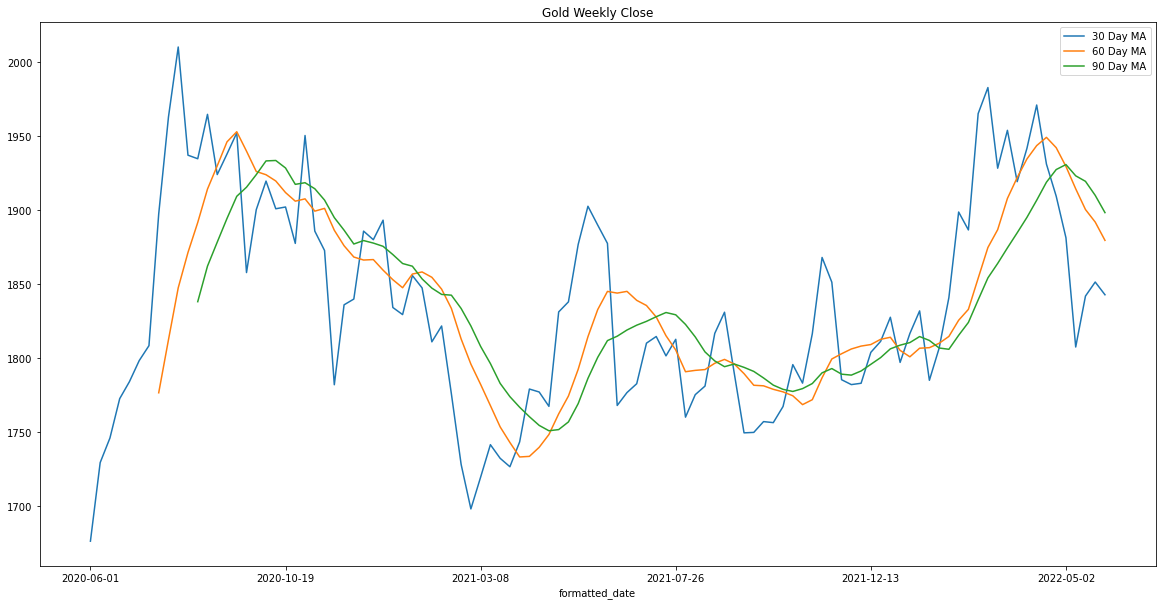

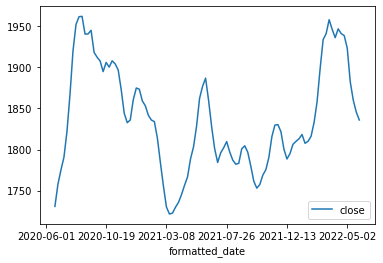

In [23]:
ax = Gold_close_df.plot(title='Gold Weekly Close',figsize=(20,10))
Gold_close_df.rolling(window=4).mean().plot()
Gold_close_df.rolling(window=8).mean().plot(ax=ax)
Gold_close_df.rolling(window=12).mean().plot(ax=ax)

# Set the legend of the figure
ax.legend(["30 Day MA", "60 Day MA", "90 Day MA"]);